# This is a demo-notebook how to work on assignments in *Cosmic.Research ML course*.

## Notebook structure

Jupyter notebook is made of cells, here are two main types of them:
- Markdown
- Code

### A markdown
This cell is a **markdown**, it allows to write text, use different *formatting* `styles`, include lists, [links](https://github.com/cosmic-research-ml-edu/cosmic.research.intro.ml/blob/master/homeworks/hw01/lab01.ipynb) and even pictures:

![](https://i.pinimg.com/236x/4f/d6/5c/4fd65ca1250fa8fc379399e1b1c6e3e4--galaxy-cat-alien-party.jpg)

Mor than that, you can write formulas with $\LaTeX$: 
$$
\sum\limits_{n=1}^{\infty} = \infty
$$

When you see a markdown, you see a pretty piece of text, but to see its original code just use double-click!

## Use markdowns to comment your results!
### Use markdowns - don't write your thoughs inside your code

In [1]:
# This cell is a code block
# For example, I will define a function here

def reverse_a_word(word):
    return word[::-1]

In [2]:
# Create a variable here

my_word = "palindrome"

In [3]:
# And run a function here (use Tab to insert names of variables faster):

print("{} - {}".format(my_word, reverse_a_word(my_word)))

palindrome - emordnilap


## Tasks demo

-  **Important!** You don't have to create your own notebook, just *fill the gaps* in the original one.
-  **More than important!** Don't delete any cells you didn't create

In this notebooks I will write markdowns with comments with two types of formatting:
- **bold** is for my technical comments
- regular is used for something you might have written while doing these tasks

**Task 01 [100500 points]** Implement a fuction that reshapes a 2D-array to make it square as possible: 

it takes $(n \times m)$ matrix and reshapes it to $(a \times b)$ so that:
- $a < b$ 
- $a \times b = n \times m$
- $|a - b| \to min$

In [4]:
import numpy as np

In [5]:
def make_matrix_square(arr):
    '''Your code here'''

**All you have to do is to write your code inside a function (don't even copy the original cell).
After you are done the cell may look like this**

In [6]:
def make_matrix_square(arr):
    elements_count = arr.shape[0] * arr.shape[1]
    sqrt = int(np.sqrt(elements_count))
    height = 1
    for i in range(1, sqrt + 1, 1):
        if elements_count % i == 0:
            height = i
    res = arr.reshape((height, -1))
    return res

test_cases = [np.random.randint(10, size=(8, 2)), np.arange(8 * 3).reshape(8, 3), np.zeros((1, 1)), np.ones((3, 2))]

for i, arr in enumerate(test_cases):
    sq_arr = make_matrix_square(arr)
    print("Test case ", i)
    print(arr),
    print("{} -> {}".format(arr.shape, sq_arr.shape))
    print(sq_arr)
    print("-----")

Test case  0
[[1 4]
 [6 2]
 [2 6]
 [4 3]
 [3 3]
 [2 9]
 [4 9]
 [9 6]]
(8, 2) -> (4, 4)
[[1 4 6 2]
 [2 6 4 3]
 [3 3 2 9]
 [4 9 9 6]]
-----
Test case  1
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]]
(8, 3) -> (4, 6)
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
-----
Test case  2
[[0.]]
(1, 1) -> (1, 1)
[[0.]]
-----
Test case  3
[[1. 1.]
 [1. 1.]
 [1. 1.]]
(3, 2) -> (2, 3)
[[1. 1. 1.]
 [1. 1. 1.]]
-----


**Don't clear the outputs after you finish your work. You don't have to comment anything - it's just your code and cell output**

**(yes, you have to run the cell)**

**Task 2 [42 points]** Import the Iris dataset and examine if the classes a balanced.

In [7]:
import pandas as pd
from sklearn.datasets import load_iris

**You start here: you import the data and create a dataset**

In [8]:
irises = load_iris()
feature_names = irises["feature_names"]
X, y = irises["data"], irises["target"]

In [9]:
df = pd.DataFrame(data=X, columns=feature_names)
df["class"] = y

In [10]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**Here you have finished data preparation and you run:**

In [11]:
df["class"].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

**Here you comment your result:**

As we can see, each class has 50 objects, hence classes are balanced.

**But somehow you are not satisfied and you decide to create a barplot:**

Let's plot distribution of objects between the classes

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

In [13]:
class_counter = Counter(y)
class_counter

Counter({0: 50, 1: 50, 2: 50})

In [14]:
labels = sorted(class_counter.keys())
values = [class_counter[label] for label in labels]

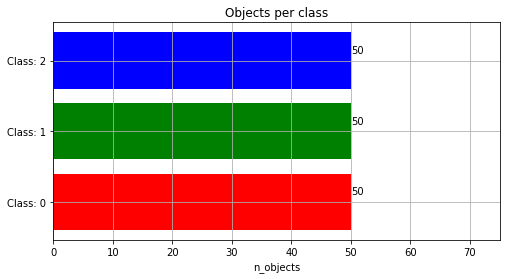

In [15]:
plt.figure(figsize=(8, 4)) # Create a figure

plt.barh(labels, values, color=["red", "green", "blue"]) # Draw a barplot

plt.yticks(np.arange(len(labels)), ["Class: " + str(label) for label in labels]) # Put custom labels on y-axis

# Add numbers on a plot (optionally)
for l, v in zip(labels, values):
    plt.text(v + 0.1, l + 0.1, str(v))

plt.title("Objects per class") # Title is a must-have
plt.xlabel("n_objects") # Axis-label is a must-have
# plt.ylabel("") we don't need it here beacuse y-ticks explain everything
plt.xlim(0, 75)
plt.grid()
plt.show()

**In this task plot is an optional feature, because 3 simple numbers for 3 classes are quite easy to comprehend, but there might be other cases with not so obvious class ratios where you should consider plotting**

**Task 3 [0.4 points]** Train a Random Forest Classifier and examine how number of trees changes classification quality. Use several metrics for classification (something apart from accuracy).

**And you go:** 

Okay let's import the model and some classification metrics:

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Then you comment:**

We will have to split the data to have a left-out set for quality assessment

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

In [19]:
for arr in (X_train, X_test, y_train, y_test):
    print(arr.shape)

(90, 4)
(60, 4)
(90,)
(60,)


Now we adjust metrics for multi-class classification:

In [20]:
def micro_precision(y_true, y_pred):
    return precision_score(y_true, y_pred, average="micro", zero_division=False)

def macro_precision(y_true, y_pred):
    return precision_score(y_true, y_pred, average="macro", zero_division=False)

def micro_recall(y_true, y_pred):
    return recall_score(y_true, y_pred, average="micro", zero_division=False)

def macro_recall(y_true, y_pred):
    return recall_score(y_true, y_pred, average="macro", zero_division=False)

def micro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average="micro", zero_division=False)

def macro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average="macro", zero_division=False)

Run the loop:

In [21]:
n_trees = np.arange(1, 10)
metrics = [
    accuracy_score, 
    micro_precision, macro_precision,
    micro_recall, macro_recall,
    micro_f1, macro_f1
]
scores = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    cur_scores = [metric(y_test, y_pred) for metric in metrics]
    scores.append(cur_scores)

Now let's plot the results:

In [22]:
xs = n_trees
ys = np.array(scores)
print(xs.shape, ys.shape)

(9,) (9, 7)


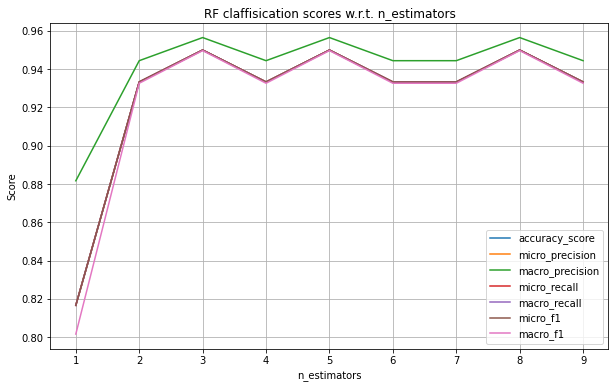

In [23]:
metric_names = [
    "accuracy_score", 
    "micro_precision", "macro_precision",
    "micro_recall", "macro_recall",
    "micro_f1", "macro_f1"   
]

plt.figure(figsize=(10, 6))

for i, name in enumerate(metric_names):
    plt.plot(xs, ys[:, i], label=name)

plt.title("RF claffisication scores w.r.t. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**And then you sum up**

Going by the plot the optimal `n_estimators` is 1, and as number of trees grows, the quality of classification fluctuates but stays lower than quality of a single tree.

I think, it has something to do with a small size of a data set and high complexity of a model with big amount of trees.